<a href="https://colab.research.google.com/github/ishiyeahman/Hyperparameter-test/blob/main/hyperprm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Ackley function
# ref : https://science-log.com/%E6%95%B0%E5%AD%A6/%E6%9C%80%E9%81%A9%E5%8C%96%E6%89%8B%E6%B3%95%E3%81%AE%E3%83%99%E3%83%B3%E3%83%81%E3%83%9E%E3%83%BC%E3%82%AF%E9%96%A2%E6%95%B0%E4%B8%80%E8%A6%A7/ 
# min, (X, Y) = (0, 0), f(X, Y) = 0
def ackley_f(X, Y):
    Z = -20*np.exp(-0.2*np.sqrt(0.5*(X**2+Y**2)))-np.exp(0.5*(np.cos(2*np.pi*X)+np.cos(2*np.pi*Y)))+np.e+20
    return Z

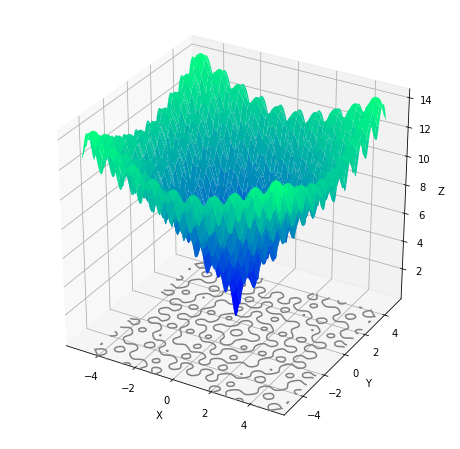

In [ ]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")

x = np.linspace(-5, 5, 256)
y = np.linspace(-5, 5, 256)

X, Y = np.meshgrid(x, y)

Z = ackley_f(X, Y)

ax.plot_surface(X, Y, Z, cmap = "winter")
ax.contour(X, Y, Z, colors = "gray", offset = -1)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [ ]:
#optuna
!pip install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.4 MB/s eta 0:00:00


In [ ]:
# optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)
    return ackley_f(x,y)

## Normal Bayesian

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

In [ ]:
print(study.best_params)
print(study.best_value)

{'x': -0.08321044177714576, 'y': 0.010948016466449495}
0.4146196562279165


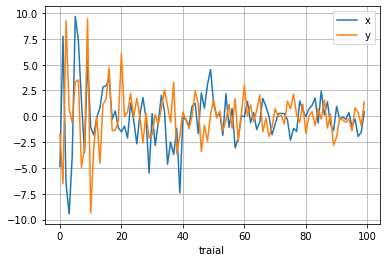

In [ ]:
plt.plot([trial.params['x'] for trial in study.trials], label='x')
plt.plot([trial.params['y'] for trial in study.trials], label='y')
plt.grid()
plt.xlabel('traial')
plt.legend()
plt.show()

## Grid search


In [ ]:
# search_space = {"x": [-10, 0, 10], "y": [-10, 0, 10]}
search_space = {"x": list(range(-10,10)), "y": list(range(-10,10))} 
study = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective, n_trials=100)


[I 2023-02-09 08:54:34,332] A new study created in memory with name: no-name-37aeeedf-33a5-451b-8765-21fbc05897a7
<ipython-input-20-430da294abae>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  x = trial.suggest_uniform('x', -10, 10)
<ipython-input-20-430da294abae>:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  y = trial.suggest_uniform('y', -10, 10)
[I 2023-02-09 08:54:34,338] Trial 0 finished with value: 15.336760885153648 and parameters: {'x': -9.0, 'y': 5.0}. Best is trial 0 with value: 15.336760885153648.
[I 2023-02-09 08:54:34,344] Trial 1 finished with value: 12.642411176571153 and parameters: {'x': -7.0, 'y': 1.0}. Best is trial 1 with val

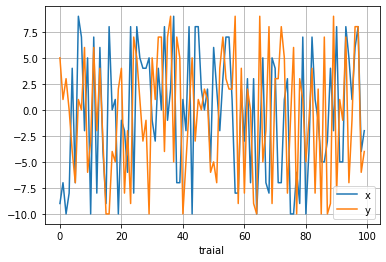

{'x': 1.0, 'y': -1.0}
3.6253849384403622


In [ ]:
plt.plot([trial.params['x'] for trial in study.trials], label='x')
plt.plot([trial.params['y'] for trial in study.trials], label='y')
plt.grid()
plt.xlabel('traial')
plt.legend()
plt.show()

print(study.best_params)
print(study.best_value)

## random search

In [ ]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=100)


[I 2023-02-09 08:55:46,069] A new study created in memory with name: no-name-b696f1b6-4fb8-4e10-b9dd-80d43b4d2be8
<ipython-input-20-430da294abae>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  x = trial.suggest_uniform('x', -10, 10)
<ipython-input-20-430da294abae>:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  y = trial.suggest_uniform('y', -10, 10)
[I 2023-02-09 08:55:46,082] Trial 0 finished with value: 16.916986210330062 and parameters: {'x': -3.4964499883476607, 'y': 8.530460780340498}. Best is trial 0 with value: 16.916986210330062.
[I 2023-02-09 08:55:46,085] Trial 1 finished with value: 10.047674501253494 and parameters: {'x': 1.7940403094

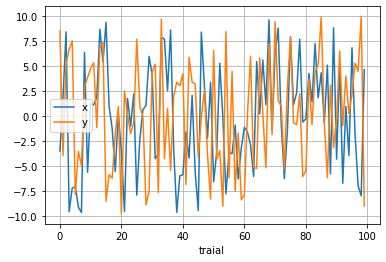

{'x': 0.6096914027605411, 'y': -0.0517172017354266}
3.284232641676976


In [ ]:
plt.plot([trial.params['x'] for trial in study.trials], label='x')
plt.plot([trial.params['y'] for trial in study.trials], label='y')
plt.grid()
plt.xlabel('traial')
plt.legend()
plt.show()

print(study.best_params)
print(study.best_value)

## CmaEs


In [ ]:
study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=100)

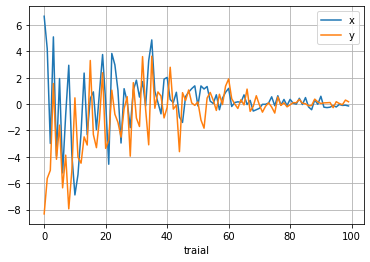

{'x': -0.031006639146500606, 'y': 0.04201148138823021}
0.21896410944661682


In [ ]:
plt.plot([trial.params['x'] for trial in study.trials], label='x')
plt.plot([trial.params['y'] for trial in study.trials], label='y')
plt.grid()
plt.xlabel('traial')
plt.legend()
plt.show()

print(study.best_params)
print(study.best_value)